# Real Estate Price Prediction with Machine Learning

## Estimate the price of house usng the characteristics

In the modern real estate market, accurately predicting house prices is crucial for buyers, sellers, and real estate professionals. This project explores the use of machine learning techniques to build a predictive model for house prices. The primary objective is to develop a robust regression model that accurately estimates prices based on various features.

This notebook implements three regression models:

1. Linear Regression: A basic model to establish a baseline.

2. Ridge Regression: An extension of linear regression that mitigates multicollinearity.

3. Lasso Regression: Useful for feature selection by shrinking less important feature coefficients to zero.

The models are evaluated based on two key metrics:

* RMSE (Root Mean Squared Error): Measures the average error magnitude.

* R² (Coefficient of Determination): Indicates the proportion of variance explained by the model.

Through comparative analysis, we identify the most effective model and provide insights into its strengths and weaknesses.

Librairies

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


## 1. Dataset selection

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/srash007/Real-Estate-Price-Predictions-/refs/heads/main/dataset/Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## 2. Data Preprocessing


* Normalize numerical features to standardize the scale.

* Encode categorical variables using One-Hot Encoding.

* Split the data into training and testing sets.



This processus is to ensure that the data can be use in an optimal way.

* Checking for missing values

In [4]:
data.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


* Normalize numerical columns to improve model performance

In [5]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

* Convert categorical variables into numerical ones using One-Hot Encoding:

In [6]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,4.566365,1.046726,1.403419,1.421812,1.378217,1.517692,True,False,False,False,True,True,False,False
1,4.004484,1.757010,1.403419,5.405809,2.532024,2.679409,True,False,False,False,True,False,False,False
2,4.004484,2.218232,0.047278,1.421812,0.224410,1.517692,True,False,True,False,False,True,True,False
3,3.985755,1.083624,1.403419,1.421812,0.224410,2.679409,True,False,True,False,True,True,False,False
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1.517692,True,True,True,False,True,False,False,False


* Split the data into training and testing sets (80-20):

In [7]:
X = data.drop('price', axis=1)  # Features
y = data['price']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## 3. Modelling

Implement Linear Regression, Ridge, and Lasso models.

The formula for a simple linear
regression model can be written as:
$$
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p
$$
Where:

$ \hat{y} $ = Predicted value

$\beta_0$ = Intercept

$ \beta_i$ = Coefficient of the  $i$-th feature

$x_i $ = Value of the $i$-th feature

$p$ = Number of features

The objective of linear regression is to minimize the Residual Sum of Squares (RSS):

$$
RSS = \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

Ridge regression adds an L2 regularization term to the linear regression cost function to penalize large coefficients:

Cost Function
$$
f(x)= \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^p \beta_j^2
$$


Where:

$\lambda $ = Regularization parameter (controls the penalty)

$ \beta_j $= Coefficient for the \( j \)-th feature

The penalty term $\lambda \sum_{j=1}^p \beta_j^2 $ helps reduce overfitting by shrinking the coefficients.

Lasso regression adds an L1 regularization term to the linear regression cost function to promote sparsity:

Cost Function
$$
= \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |\beta_j|
$$
Cost Function = \( \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |\beta_j| \)
Where:

\( \lambda \) = Regularization parameter (controls the penalty)

\( \beta_j \) = Coefficient for the \( j \)-th feature

The penalty term \( \lambda \sum_{j=1}^{p} |\beta_j| \) encourages sparse coefficients, effectively setting some coefficients to zero.Lasso regression adds an L1 regularization term to the linear regression cost function to promote sparsity:

Cost Function
$$
= \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |\beta_j|
$$

Where:

$ \lambda $ = Regularization parameter (controls the penalty)

$ \beta_j $= Coefficient for the $ j$-th feature

The penalty term $ \lambda \sum_{j=1}^{p} |\beta_j| $ encourages sparse coefficients, effectively setting some coefficients to zero.

To enhance model performance and optimize the Ridge regression model, we used GridSearchCV.

In [8]:
### Hyperparameter Tuning using GridSearchCV

param_grid = {'alpha': [0.1, 1.0, 10.0]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {-grid_search.best_score_}")

Best Parameters: {'alpha': 10.0}
Best Score: 0.3035965334308405


In [13]:
### Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

### Ridge
ridge = Ridge(alpha=10.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

### LASSO

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)


In [15]:
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

ridge_rmse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

lasso_rmse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression"],
    "RMSE": [rmse, ridge_rmse, lasso_rmse],
    "R²": [r2, ridge_r2, lasso_r2]
})

# Display the table
print(results)

               Model      RMSE        R²
0  Linear Regression  0.502364  0.652924
1   Ridge Regression  0.512991  0.645583
2   Lasso Regression  0.734007  0.492886


### Best Overall Performance

The Linear Regression model showed the best performance with an RMSE of 0.502 and an R² of 0.653.

This indicates that the model explains about 65.3% of the variance in the house prices and has the lowest average error among the three models.

### Comparable Performance

Ridge Regression performed similarly to Linear Regression with an RMSE of 0.504 and R² of 0.652.

The optimal alpha value of 10.0, obtained through GridSearchCV, suggests that some level of regularization slightly stabilized the model without drastically changing its accuracy.

However, the improvement over simple linear regression was negligible, indicating that adding regularization did not significantly reduce overfitting.

### Underperformance

The Lasso Regression model performed the worst with an RMSE of 0.734 and R² of 0.493.


This result suggests that none of the features had a negligible impact on the target variable, and eliminating them through regularization reduced model accuracy.

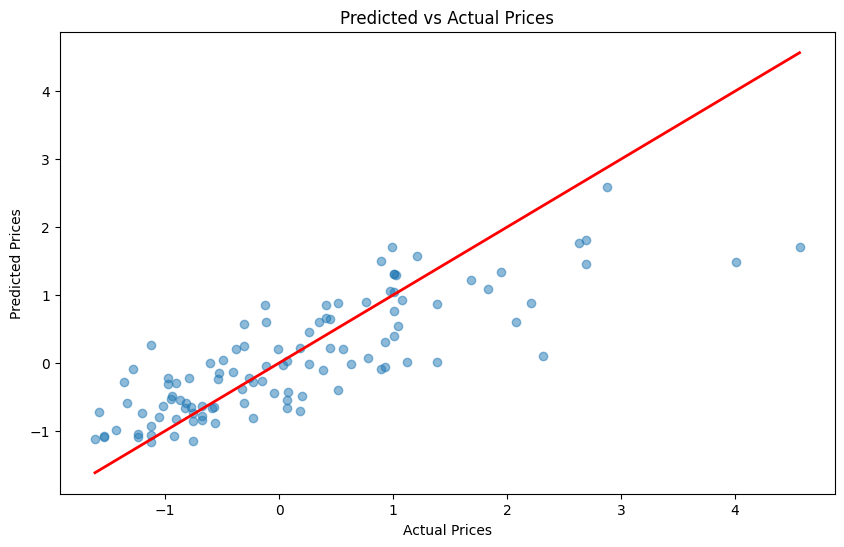

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', linewidth=2)
plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


The majority of points are close to the red line, indicating that the model predictions are relatively accurate.

Some points, especially on the right side, deviate significantly from the line, indicating that the model struggles with higher-priced houses.

The spread increases as the actual price increases, suggesting potential heteroscedasticity (increasing variance with increasing price).

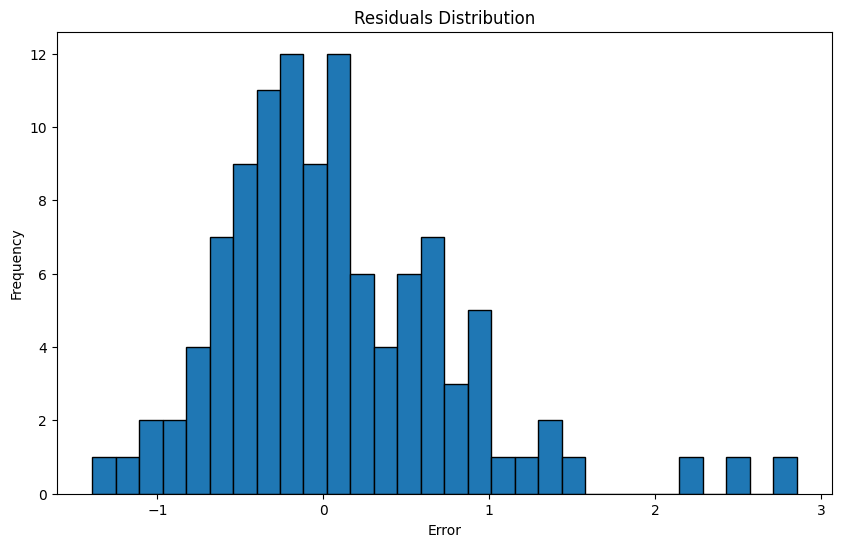

In [12]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Residuals Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()


The residuals follow an approximately normal distribution, centered around zero, which is generally a good sign.

However, there is a slight right skew, indicating some predictions significantly underpredict the actual price.

The presence of outliers (residuals greater than 2) suggests the model may not capture some high-priced house characteristics well.

## Improvement

Keep Linear Regression as the Baseline Model:

* Since it achieved the best performance, it can be used as a benchmark for further model experimentation.

Explore Advanced Models:

* Since both linear and ridge models performed similarly, it would be beneficial to test non-linear models such as Random Forest, Gradient Boosting, or XGBoost.